In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
arrests = pd.read_csv('USArrests.csv')

# Explore EDA of arrests

In [7]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


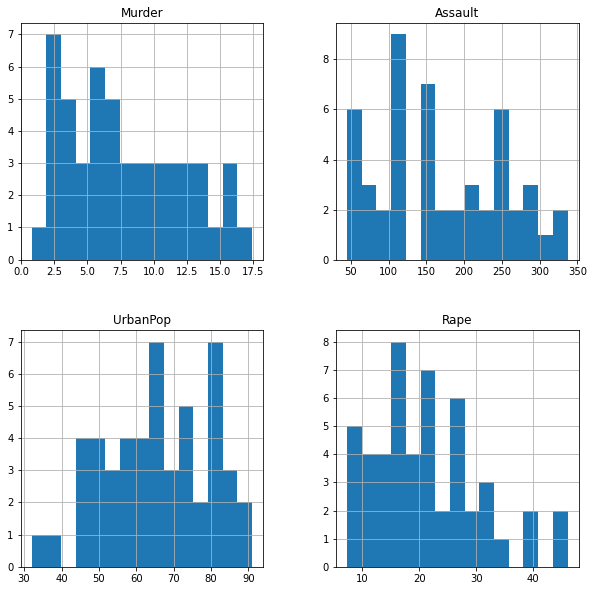

In [12]:
arrests.hist(bins=15, figsize=(10,10));

# Prepare for K Means

- everything must be numerical
- ideally similar scales for all features

In [15]:
# move first column to the index

arrests.index=arrests.iloc[:,0] # [rows, columns] - we don't put them in rows as we want all of them
# we move state column to index

In [16]:
arrests=arrests.iloc[:,1:5] # keep only value columns

In [17]:
arrests

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [19]:
arrests.rename_axis(None, inplace = True) # delete extra header index

In [20]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


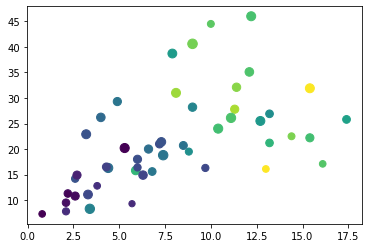

In [21]:
plt.scatter(arrests.iloc[:,0], arrests.iloc[:,3], arrests.iloc[:,2], arrests.iloc[:,1]); #x, y, size, color
# x= murder, y=rapes, size=Urban pop, color = assault 

# Let's try the cluster

In [26]:
kmeans = KMeans(n_clusters=7, random_state=5)

In [27]:
cluster=kmeans.fit(arrests)

In [28]:
cluster.cluster_centers_ # we have 7 clusters and the numbers represent all information of each center of the cluster in 4 dimensions

array([[  5.75      , 156.75      ,  74.        ,  19.4       ],
       [ 12.975     , 271.5       ,  52.5       ,  29.05      ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.1625    , 251.125     ,  76.375     ,  28.875     ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333]])

In [29]:
cluster.labels_  # a label to the cluster that each row of the database belong

array([4, 1, 5, 6, 4, 6, 3, 4, 5, 6, 2, 3, 4, 3, 2, 3, 3, 4, 2, 5, 0, 4,
       2, 1, 6, 3, 3, 4, 2, 0, 1, 4, 5, 2, 3, 0, 0, 3, 0, 1, 2, 6, 6, 3,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [33]:
arrests['cluster']=cluster.labels_

In [34]:
arrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,4


In [35]:
arrests['cluster'].value_counts()  #number of elements in each cluster

3    10
2    10
4     8
0     8
6     6
1     4
5     4
Name: cluster, dtype: int64

# Visualization

In [13]:
import plotly.graph_objs as go

In [45]:
markersize= arrests['UrbanPop']
markercolour= arrests['cluster']
fig1=go.Scatter3d(x=arrests['Murder'],
                  y=arrests['Rape'],
                  z=arrests['Assault'],
                 marker=dict (size=markersize,
                              color=markercolour,
                              opacity=0.9,
                              colorscale='Turbo'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout
mylayout=go.Layout(scene=dict(xaxis=dict(title='Murder'),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [46]:
import plotly

In [47]:
plotly.offline.plot({'data':[fig1],
                    'layout':mylayout},
                   auto_open=True,
                   filename=('5Dplot.html'))

'5Dplot.html'

# Try scaling to improve clustering

In [48]:
#drop created cluster (it would affect clustering)
arrests.drop(['cluster'], axis=1,inplace=True)

In [49]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(arrests)

MinMaxScaler()

In [68]:
scaled_arrests=scaler.transform(arrests)

In [69]:
type(scaled_arrests)

numpy.ndarray

In [70]:
arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [71]:
scaled_arrests_df=pd.DataFrame(scaled_arrests,columns=['Murder', 'Assault', 'UrbanPop', 'Rape'])

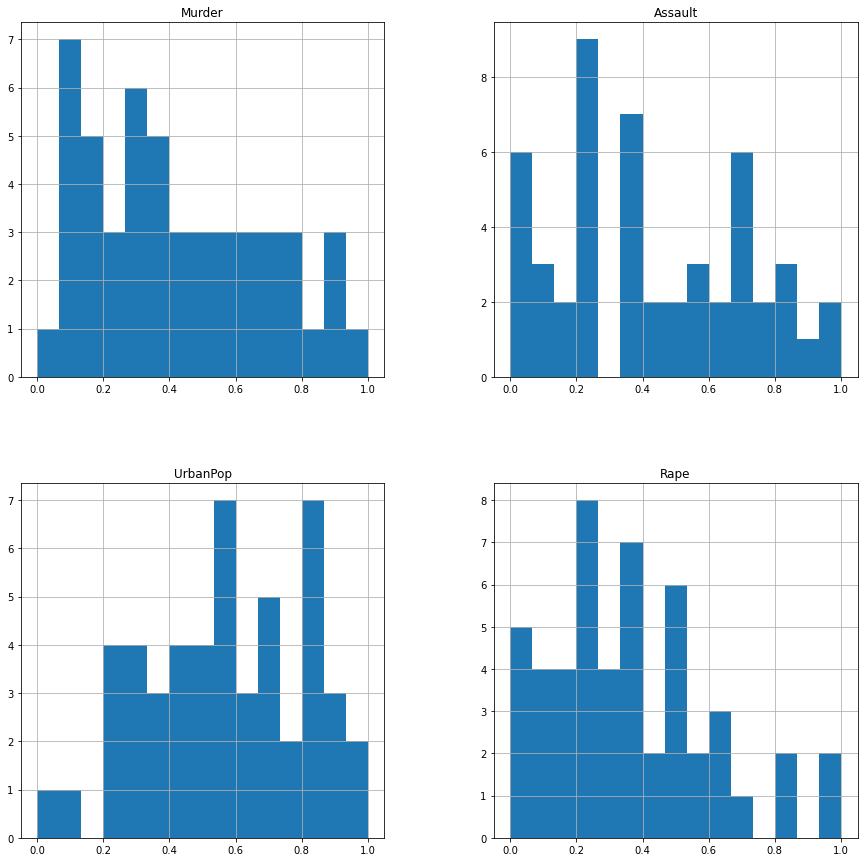

In [72]:
scaled_arrests_df.hist(bins=15, figsize=(15,15));

# Apply clustering again

In [73]:
cluster_scaled=kmeans.fit(scaled_arrests_df)

In [74]:
cluster_scaled.cluster_centers_

array([[0.11370482, 0.09246575, 0.25847458, 0.08074935],
       [0.3939759 , 0.38150685, 0.50847458, 0.33540052],
       [0.5686747 , 0.70205479, 0.71864407, 0.87028424],
       [0.25301205, 0.2925636 , 0.84261501, 0.30638612],
       [0.64371773, 0.78424658, 0.77966102, 0.54374308],
       [0.20481928, 0.16438356, 0.61299435, 0.18260121],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388]])

In [75]:
cluster_scaled.labels_

array([6, 2, 4, 1, 2, 2, 5, 1, 4, 6, 3, 0, 4, 1, 0, 5, 1, 6, 0, 4, 3, 2,
       5, 6, 1, 1, 5, 2, 0, 3, 4, 4, 6, 0, 3, 1, 1, 5, 3, 6, 0, 6, 4, 3,
       0, 1, 3, 0, 5, 1], dtype=int32)

In [76]:
scaled_arrests_df['cluster_scaled']=cluster_scaled.labels_

In [77]:
scaled_arrests_df['cluster_scaled'].value_counts()

1    10
0     8
6     7
4     7
3     7
5     6
2     5
Name: cluster_scaled, dtype: int64

In [82]:
markersize= scaled_arrests_df['UrbanPop']
markercolour= scaled_arrests_df['cluster_scaled']
fig1=go.Scatter3d(x=scaled_arrests_df['Murder'],
                  y=scaled_arrests_df['Rape'],
                  z=scaled_arrests_df['Assault'],
                 marker=dict (color=markercolour,
                              opacity=0.9,
                              colorscale='Turbo'),
                 line=dict (width=0.2),
                 mode='markers')
#make layout
mylayout=go.Layout(scene=dict(xaxis=dict(title='Murder'),
                              yaxis=dict(title='Rape'),
                              zaxis=dict(title='Assault')))

In [83]:
plotly.offline.plot({'data':[fig1],
                    'layout':mylayout},
                   auto_open=True,
                   filename=('5Dplot.html'))

'5Dplot.html'

# Pick the right number of clusters

In [86]:
cluster_scaled.inertia_

2.6092871883382704

In [88]:
K=range(3,15) # what's the range of k that makes sense for your data?
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=5)
    kmeans.fit(scaled_arrests_df)
    inertia.append(kmeans.inertia_)

In [91]:
import numpy as np

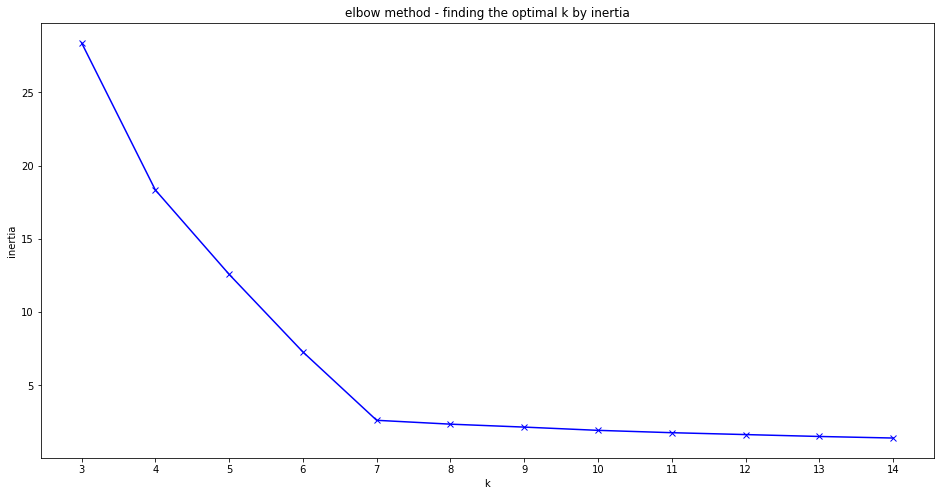

In [94]:
# Plot the inertia:

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1,1.0))
plt.title('elbow method - finding the optimal k by inertia');


In [96]:
# we should choose K = 7 as the best number of clusters, where the slope changes

In [95]:
from sklearn.metrics import silhouette_score

In [98]:
# Plot the silhouette distorsion:

K=range(3,9) 
silhouettes=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=5)
    kmeans.fit(scaled_arrests_df)
    silhouettes.append(silhouette_score(scaled_arrests_df,kmeans.predict(scaled_arrests_df)))

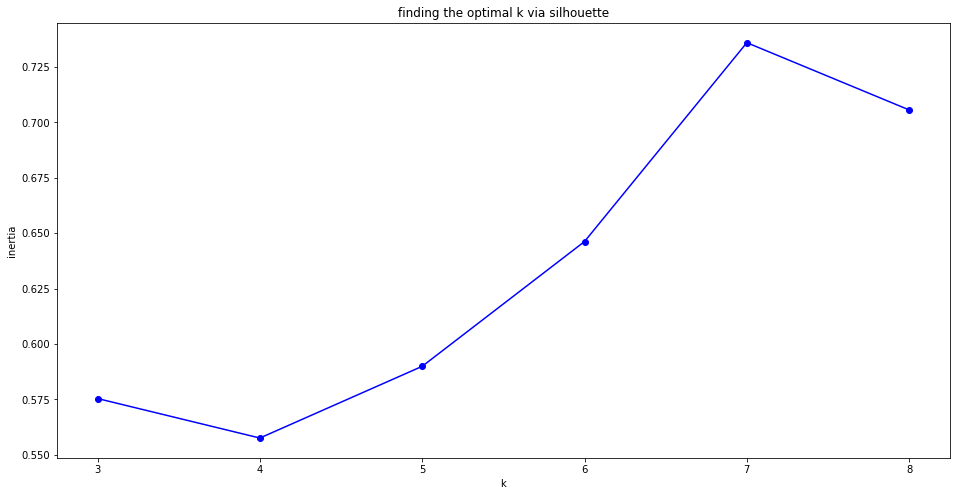

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1,1.0))
plt.title('finding the optimal k via silhouette');

#definition
#1 - clusters are well apart from eachother / clearly distinguishable
#0 - clusters are indifferent, distance between them is not significant
#-1 - clusters are assigned incorrectly - there is merging of clusters

# Use the results

In [ ]:
# Re-run k means with the right number of clusters
# Add cluster label into your data frame
# Introduce new row (remember to use the same scaler! or go back to raw data)

In [100]:
arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [101]:
roger_state={'Murder':2, 'Assault':46, 'Urban Pop':20,'Rape':10} 
# we are introducing one new element (invented) to the table to see how the algorigthm classifies it in one of the clusters

In [102]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [104]:
# Create a dataframe of your new row
roger_state_df=pd.DataFrame.from_dict([roger_state])

In [105]:
roger_state_df

,Murder,Assault,Urban Pop,Rape
0,2,46,20,10


- MinMaxScaler.fit(old_data_df) # learning about old data 
- MinMaxScaler.transform(new_data_df) #transforming the new entry with the model trained
- Kmeans.fit(old_data_df) #training the model with old data
- Kmeans.predict(new_data_df) #predicting the cluster of the new data entry with the trained model

In [108]:
# re-run kmeans to fit to our old data frame (with correct number of clusters)
kmeans=KMeans(n_clusters=7, random_state=5)
kmeans.fit(arrests)

KMeans(n_clusters=7, random_state=5)

In [109]:
kmeans.predict(roger_state_df)  # this tells us the cluster is number 2 (for the new data entry)

/Users/rogerserret/opt/anaconda3/envs/RogerClass/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Urban Pop
Feature names seen at fit time, yet now missing:
- UrbanPop




array([2], dtype=int32)

In [110]:
c_new=2

In [111]:
arrests['cluster']=kmeans.labels_

In [112]:
arrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,5
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,4


# What state is like Roger state?

In [113]:
arrests[arrests.cluster==c_new].sample(1) #we check an example of a state in the cluster

,Murder,Assault,UrbanPop,Rape,cluster
Minnesota,2.7,72,66,14.9,2


In [ ]:
# Roger state is like Minnesota or other in the cluster

In [114]:
roger_state_df # they are quite similar!

,Murder,Assault,Urban Pop,Rape
0,2,46,20,10
